## Немного о динамической типизации

Как мы уже видели из прошлых примеров, переменная в Python не имеет фиксированного типа

In [ ]:
a = 5
print(type(a))

a = '5'
print(type(a))

<class 'int'>
<class 'str'>


In [1]:
import gc
gc.get_threshold()

(700, 10, 10)

Кому интересно сборка мусора в Python подробнее https://habr.com/ru/articles/417215/

In [ ]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Built-in subclasses:
 |      bool
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      True if 

Как думаете, в чем может быть потенциальная проблема в такой функции?

In [ ]:
def add_objects(obj_one, obj_two):
    return obj_one + 2 * obj_two

In [ ]:
add_objects(1, 5)

11

In [ ]:
add_objects('str1', 'str2')

'str1str2str2'

Есть некоторая вероятность, что мы хотим, чтобы наш код работал только ожидаемым для нас образом. Для этого можно явно подсветить входные и выходные типы данных. Эту информацию может использовать ваша IDE для подсказок об ошибках в типизации

In [9]:
def refined_add_objects(obj_one: int, obj_two: int) -> int:
    return obj_one + 2 * obj_two

refined_add_objects(5, 10)

25

In [10]:
refined_add_objects('5', '10')

'51010'

Для более строгой типизации можно обратиться к модулю typing

In [ ]:
from typing import List

def refined_add_objects(obj_one: List, obj_two: List):
    return obj_one + 2 * obj_two

Также есть типа для словаря

In [ ]:
from typing import Dict

my_dict: Dict[str, int] = {}

## Еще немного о float в Python

Вы помните, как хранятся с памяти компьютера float?

### Ограничения

Мы знаем, что компьютер оперирует числами в двоичной системе. Из-за этого мы можем

Иногда значения сопоставимы, как, например в случае с дробью 1/8

$\frac{1}{8} = 0.125_{10} = 1 / 10 + 2 / 100 + 5 / 1000$ и $0.001_2 = \frac{1}{8}$

In [ ]:
0.125 == 1 / 8

True

На примере десятичной системы счисления, мы, например, уже никак не можем точно записать дробь $\frac{1}{3}$:

$\frac{1}{3} \approx 0.3 \approx 0.33 \approx 0.33(3)$

Также и в двоичной уже дробь $\frac{1}{10}$ не представляется точно:

0.0001100110011001100110011001100110011001100110011...

Как думаете, что будет храниться в переменной со значением 0.1?

In [ ]:
1 / 10

0.1

In [ ]:
f'{1 / 10:.25g}'

'0.1000000000000000055511151'

Документация по модулю sys https://docs.python.org/3/library/sys.html

In [ ]:
import sys
sys.float_info.dig

15

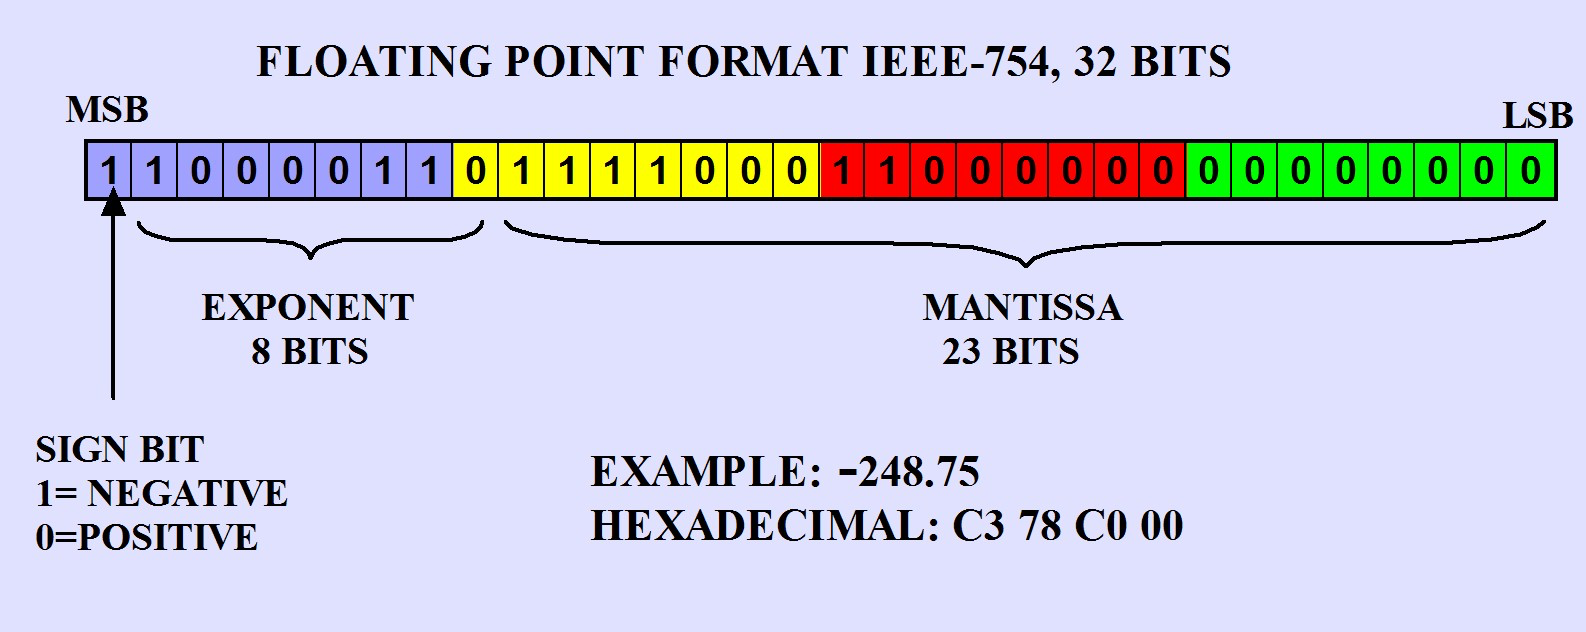

In [ ]:
exponent = int('10000110', 2) - 127 # 127 смещение для экспоненты, тут хранится степень двойки для смещения мантиссы
exponent

7

In [ ]:
mantissa = '11110001100000000000000'
mantissa_2 = int(mantissa, 2)
mantissa_10 = 1
for i, bit in enumerate(mantissa):
  mantissa_10 += int(bit) * (2 ** -(i + 1))
mantissa_10

1.943359375

In [ ]:
mantissa_10 * pow(2, exponent)

248.75

In [ ]:
import struct
hex_value = bytes.fromhex('C378C000')
float_value = struct.unpack('!f', hex_value)[0]
float_value

-248.75

In [ ]:
0.1.as_integer_ratio()

(3602879701896397, 36028797018963968)

### Будьте очень аккуратны со сравнениями float

In [ ]:
1.53 - 1. == 0.53

True

In [ ]:
10.4 + 20.8 > 31.2

True

In [ ]:
0.8 - 0.1 > 0.7

True

In [ ]:
f'{0.8 - 0.1:.25f}'

'0.7000000000000000666133815'

In [ ]:
.1 + .1 + .1 == .3

False

In [ ]:
round(.1, 1) + round(.1, 1) + round(.1, 1) == round(.3, 1)

False

Хорошая напоминалка есть во многих источниках и в частности в [официальной документации](https://docs.python.org/3/tutorial/floatingpoint.html)

### Как можно делать?

In [ ]:
desired_value = 0.1 + 0.2
answer_value = 0.3

round(desired_value, 3) == round(answer_value, 3)

True

Для дробных значений можно использовать модуль `fractions`

In [ ]:
from fractions import Fraction

val = Fraction(1, 10)

In [ ]:
val + val + val == Fraction(3, 10)

True

Можно использовать метод `isclose()` из `math`

In [ ]:
from math import isclose

In [ ]:
isclose(0.1 + 0.2, 0.3)

True

## Строки и разное с ними связанное

### Строки и кавычки

In [ ]:
print("Hello world!")

Hello world!


Строка – это объект, как и число. Строки используются для записи текстовой информации, а также произвольных последовательностей байтов. Чтобы отличать обычную строку от строк кода, её нужно обрамлять либо одинарными, либо двойными кавычками.

In [ ]:
#Например:
"Hello world!" == 'Hello world!'


True

Если текст состоит из нескольких строк, его нужно обрамлять в тройные кавычки

In [ ]:
print("""Hello
world!""")

Hello 
world!


Кавычки в таких случаях также могут быть как одинарными, так и двойными

In [4]:
print('''Hello
\tworld!''')

Hello
	world!


Символы кавычек внутри строк нужно экранировать, то же самое со специсимвлолами. Например, `\t` (символ вертикальной табуляции) или `\n` -- символ перевода строки

### Что такое строка

Строка -- это частный случай последоватьностей в Python, представитель группы `Flat sequences`, немного более детально, если интересно можно посмотреть тут https://medium.com/@mertbayraktarxd/container-sequences-vs-flat-sequences-in-python-39dd2ca31d72. То есть, строка -- это последовательность, каждый элемент в которой представляет лишь один тип. Можно сказать, что строка -- это последовательность символов.

Также строка -- одна из неизменяемых последовательностей (immutable sequences). Это значит, что мы не можем ее изменить после создания

In [ ]:
example_str = 'example_str'

Строка является последовательностью односимвольных строк, к которым можно получить доступ. Строки можно сохранять в переменные и выполнять над ними некоторые операции.

In [ ]:
print("What is your name?")
name = input()
print("Hello," + name)

What is your name?


 Denis


Hello,Denis


Функция **len()** возвращает длину строки-параметра

In [ ]:
s = input()
print(len(s))

hello
5


### Что происходит, когда мы печатаем на экран?

Вам что-то говорят следующие названия?   `__repr__ , __str__`

In [ ]:
class MyPrettyInt:
    def __init__(self, value: int):
        self.value = value

    def __repr__(self):
        return f'MyPrettyInt({self.value})'

    def __str__(self):
        return f'here is my pretty {self.value}'

Строка, возвращаемая `__repr__` должна быть однозначной и по возможности совпадать с кодом, требуемым для создания показываемого объекта

Строка, возвращаемая `__str__`, должна быть понятной конечному пользователю

У разных объектов в Python могуть быть по-разному объявлены данные методы

In [ ]:
m = MyPrettyInt(5)
m

MyPrettyInt(5)

In [ ]:
print(m)

here is my pretty 5


In [ ]:
print([m])

[MyPrettyInt(5)]


### Слайсы на примере строк

#### Немного общей информации

    "As you may have noticed, several of the operations mentioned work equally for texts, lists and tables. Texts, lists and tables together are called trains.
    […] The FOR command also works generically on trains"

Мощь Python в том, что для многих схожих классов у нас есть общее множество поддерживаемых операций. Например, strings, lists, byte sequences, arrays и др. поддерживают iteration, slicing, sorting, contactenation и прочие общие операции.

Понимание и принятие данного принципа помогает нам не изобретать велосипед, а использовать общий интерфейс, который дает реализуемым классам поддержку уже принятых методов

#### Slicing (срезы, слайсы, whatever you call it)

**Slicing** -- это общая фича всех последовательностей в Python. Ниже мы рассмотрим ее на примере строк, но помните, что это относится и к другим последовательностям

`sequence[start:stop:step]`

Срезы нужны для того, чтобы извлечь подстроки или символы из исходной строки. Таким образом, создаётся новая строка, а исходная остается неизменённой.

#### Basics

Чтобы обратиться к символу строки, используются две нумерации: неотрицательными и отрицательными числами.

![alternate text](https://pp.userapi.com/c837320/v837320502/59b9f/c4cTcRUnMWg.jpg)

Нумерация неотрицательными числами начинается с 0 и идет слева направо. То есть чтобы получить первый символ строки s, нужно написать s[0], второй символ – s[1], и т.д.

Нумерация отрицательными числами начинается с -1 и также идет слева направо (справа налево, если смотреть на модуль числа). То есть чтобы получить последний символ строки s, нужно написать s[-1], предпоследний символ – s[-2], и т.д.

In [12]:
# Например
s = "Hello world!"  # создали переменную s со содержимым “Hello world!”
print(len(s))
print(s[1])  # печатает первый символ строки
print(s[-2])  # печатает последний символ строки
# print(s[15])  # выдаст ошибку, так как должна напечатать 16-ый элемент строки, а длина строки s меньше 16 символов

12
e
d


Следующий вид срезов – с двумя параметрами, между которыми ставится двоеточие. Если нужно получить подстроку строки s с __i__ по __j__ символы включительно, то нужно применить срез __s[i: j+1]__.

Правая граница не включается

Это не просто так!

#### Правая граница

1. Просто сразу видеть длину слайса, если задана только конечная позиция!
`my_seq[:3] -- 3 items`

2. Просто посчитать длину!
`stop - start == length`

3. Просто разбирать на две части без пересечения!


In [16]:
my_seq = '123456789'

print(my_seq[:3], my_seq[3:])

for i in range(len(my_seq)):
    print(i, my_seq[:i], my_seq[i:])
    assert my_seq[:i] + my_seq[i:] == my_seq

123 456789
0  123456789
1 1 23456789
2 12 3456789
3 123 456789
4 1234 56789
5 12345 6789
6 123456 789
7 1234567 89
8 12345678 9


#### Step

In [19]:
my_seq[0:-1:1]

'12345678'

In [ ]:
my_seq[:-1]

'12345678'

А как можно развернуть строчку?

In [ ]:
my_seq[::-1]

'987654321'

#### Слайсы можно именовать

Пусть у нас есть большая строчка

In [ ]:
invoice = """
0.....6.................................40........52...55........
1909  Pimoroni PiBrella                   $17.50     3    $52.50
1489  6mm Tactile Switch x20              $4.95      2    $9.90
1510  Panavise Jr. - PV-201               $28.00     1    $28.00
1601  PiTFT Mini Kit 320x240              $34.95     1    $34.95
"""

In [ ]:
NUMBER = slice(0, 6)
DESC = slice(6, 40)
PRICE = slice(40, 52)
TOTAL = slice(55, None)

for sold_item in invoice.split('\n')[2:]:
    print(sold_item[PRICE], sold_item[DESC])

  $17.50     Pimoroni PiBrella                 
  $4.95      6mm Tactile Switch x20            
  $28.00     Panavise Jr. - PV-201             
  $34.95     PiTFT Mini Kit 320x240            
 


In [ ]:
invoice_part = '1909  Pimoroni PiBrella                   $17.50     3    $52.50'
invoice_part[PRICE]

'  $17.50    '

### Форматирование

Часто возникают ситуации, когда нужно сделать строку, подставив в неё некоторые данные, полученные в процессе выполнения программы.
Форматирование можно сделать с помощью оператора %, format и f-string

Чтобы отформатировать строку  требуется:


#### Оператор %.  

<Строка формата, содержащая один или более спецификаторов формата(например, %d (digit))> % <объект (или объекты, в виде кортежа),значение которого должно быть подставлено на место спецификатора (или спецификаторов) в левой части выражения>.


In [ ]:
print('That  is  %d  %s  fish!' % (1, 'gold'))

That  is  1  gold  fish!


In [ ]:
"%d %s %d you" % (int(input()), input(), int(input()))

 1
 spam
 4


'1 spam 4 you'

In [ ]:
"%s -- %s -- %s" % (42, 3.14159, [1, 2, 3])

'42 -- 3.14159 -- [1, 2, 3]'

**почему так больше не надо**

Хотя бы потому, что это очень длинно и малочитаемо

In [ ]:
first_name = "Eric"
last_name = "Idle"
age = 74
profession = "comedian"
affiliation = "Monty Python"

"Hello, %s %s. You are %s. You are a %s. You were a member of %s." % (first_name, last_name, age, profession, affiliation)

'Hello, Eric Idle. You are 74. You are a comedian. You were a member of Monty Python.'

#### format

In [21]:
weight_of_one_sheep = 23.1234
'One sheep is {:.4f} kilos'.format(weight_of_one_sheep)

'One sheep is 23.1234 kilos'

`format` позволяет задать тип числа и отформатировать строку

In [ ]:
'{:*<30}'.format('left aligned')  # "*" здесь задаваемый символ

'left aligned******************'

In [ ]:
'{:*>30}'.format('right aligned')  # "*" здесь задаваемый символ

'*****************right aligned'

In [ ]:
'{:*^30}'.format('aligned')  # "*" здесь задаваемый символ


'***********aligned************'

In [ ]:
'{:+f}; {:+f}'.format(3.14, -3.14)  # всегда показывать знак

'+3.140000; -3.140000'

In [ ]:
'{:.25g}'.format(3.14)  # показать первые n значимых цифр

'3.140000000000000124344979'

In [ ]:
'{0:b} {0:x}'.format(1337)  # показать в бинарном или hex виде

'10100111001 539'

In [ ]:
'{:10.2f}'.format(314.314)  # можно задать точность

'    314.31'

А как записать с нулями впереди?

In [ ]:
'{:010.2f}'.format(314.314)

'0000314.31'

Удобство *.format* заключается в том, что можно передавать строку с плейсхолдерами, а потом их доопределять. Плейсхолдеры могут быть именованными или нет, в единственном числе или множество. Пример:

In [ ]:
new_estimation = 42.

future_info_unnamed = 'Our brand new estimation of sheeps weight is {:.3f} kilos'
print(future_info_unnamed.format(new_estimation))

future_info_named = 'Our brand new estimation of sheeps weight is {new_value:.3f} kilos'
print(future_info_named.format(new_value=new_estimation))

future_info_named_mult = 'Our brand new estimation of sheeps {item} is {new_value:.3f} kilos'
print(future_info_named_mult.format(new_value=new_estimation, item='weight'))

Our brand new estimation of sheeps weight is 42.000 kilos
Our brand new estimation of sheeps weight is 42.000 kilos
Our brand new estimation of sheeps weight is 42.000 kilos


In [ ]:
'{0}, {1}, {2}'.format('a', 'b', 'c')

'a, b, c'

In [ ]:
'{}, {}, {}'.format('a', 'b', 'c')

'a, b, c'

In [ ]:
'{2}, {0}, {1}'.format('a', 'b', 'c')

'c, a, b'

Классно, но все еще длинно

In [ ]:
first_name = "Eric"
last_name = "Idle"
age = 74
profession = "comedian"
affiliation = "Monty Python"

pattern_str = "Hello, {first_name} {last_name}. You are {age}. You are a {profession}. You were a member of {affiliation}."

pattern_str.format(
    first_name=first_name,
    last_name=last_name,
    age=age,
    profession=profession,
    affiliation=affiliation,
)

'Hello, Eric Idle. You are 74. You are a comedian. You were a member of Monty Python.'

Можно чуть короче, если есть dict

In [ ]:
data = {
    'first_name': 'John',
    'last_name': 'Doe',
    'age': '18',
    'profession': 'seeker',
    'affiliation': 'humanity'
}

pattern_str.format(**data)

'Hello, John Doe. You are 18. You are a seeker. You were a member of humanity.'

#### f-strings

Как format, только чуть короче

Можно писать коротко

In [24]:
name = 'Denis'
surname = 'Belyakov'

f'my name is {name} {surname}'

'my name is Denis Belyakov'

И можно использовать выражения!

In [ ]:
f'my name is {name.upper()} {surname[:4] if len(surname) > 4 else surname}'

'my name is DENIS Bely'

In [ ]:
number = 123456.1234
f"{number:012.2f}"

'000123456.12'

In [ ]:
f"{number:12.2}"

'     1.2e+05'

Вспомним про два возможных строковых представления для объектов

In [ ]:
class MyPrettyInt:
    def __init__(self, value: int):
        self.value = value

    def __repr__(self):
        return f'MyPrettyInt({self.value})'

    def __str__(self):
        return f'here is my pretty {self.value}'

Вызов `format` для него будет вызывать метод `__str__`, а потом уже `__repr__`

In [ ]:
pretty_int = MyPrettyInt(4)

In [ ]:
f'{pretty_int} and it is the prettiest!'

'here is my pretty 4 and it is the prettiest!'

Можно насильно вызвать представление через `__repr__` написав `!r`

In [ ]:
f'{pretty_int!r} and it is the prettiest!'

'MyPrettyInt(4) and it is the prettiest!'

In [ ]:
num = '4'
f'there is a great number {num}'

'there is a great number 4'

In [ ]:
f'there is a great number {num!r}'

"there is a great number '4'"

**Мультистрока**

In [ ]:
print(f'''
My
name is {name}
and surname is {surname}
''')


My 
name is Denis
and surname is Belyakov



In [25]:
sample_str = f'My ' \
             f'name is {name} ' \
             f'and surname is {surname}' \

print(sample_str)

My name is Denis and surname is Belyakov


**А еще он быстрее**

In [ ]:
name = 'John'
surname = 'Doe'
age = 99

In [ ]:
%%timeit -n 1000000
'name is %s, surname is %s, and age is %d' % (name, surname, age)

130 ns ± 2.72 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
%%timeit -n 1000000
'name is {name}, surname is {surname}, and age is {age}'.format(name=name, surname=surname, age=age)

431 ns ± 2.03 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
%%timeit -n 1000000
f'name is {name}, surname is {surname}, and age is {age}'

108 ns ± 2.83 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


**special cases**

In [ ]:
f'I love \'Nestle\' chocolate' # экранирование

"I love 'Nestle' chocolate"

In [ ]:
f'Values in braces are the best: {{4 + 5}}'  # {{}} для показа скобочек

'Values in braces are the best: {4 + 5}'

In [ ]:
f'Values in braces are the best: {{{4 + 5}}}'  # {{{}}} для показа скобочек и вычисления

'Values in braces are the best: {9}'

In [ ]:
f'Values in braces are the best: {{{{4 + 5}}}}'  # {{{}}} для показа скобочек и вычисления

'Values in braces are the best: {{4 + 5}}'

Ну, вы поняли

### Дополнительные функции и методы строк

In [ ]:
# Функция input() считывает строку из консоли, пока не нажат enter
s = input()
print(s*3)

 10


101010


In [29]:
"hhhj, ooo, iii".split(",", 1)

['hhhj', ' ooo, iii']

*Поиск подстроки в строке. Возвращает номер первого вхождения или -1*

    s.find(str, [start],[end])
    
*Поиск подстроки в строке. Возвращает номер последнего вхождения или -1*

    s.rfind(str, [start],[end]

*Поиск подстроки в строке. Возвращает номер первого вхождения или вызывает ValueError*

    s.index(str, [start],[end])

*Поиск подстроки в строке. Возвращает номер последнего вхождения или вызывает ValueError*

    s.rindex(str, [start],[end])
    
*Замена шаблона*

    s.replace(шаблон, замена)
    
*Разбиение строки по разделителю*

    s.split(символ)
    
*Состоит ли строка из цифр*

    s.isdigit()
    
*Состоит ли строка из букв*

    s.isalpha()

*Состоит ли строка из цифр или букв*

    s.isalnum()

*Состоит ли строка из символов в нижнем регистре*

    s.islower()
    

*Состоит ли строка из символов в верхнем регистре*
    
    s.isupper()

*Состоит ли строка из неотображаемых символов (пробел, символ перевода страницы ('\f'), "новая строка" ('\n'), "перевод каретки" ('\r'), "горизонтальная табуляция" ('\t') и "вертикальная табуляция" ('\v'))*
    
    s.isspace()

*Начинаются ли слова в строке с заглавной буквы*

    s.istitle()

*Преобразование строки к верхнему регистру*
    
    s.upper()

*Преобразование строки к нижнему регистру*
    
    s.lower()

*Начинается ли строка S с шаблона str*
    
    s.startswith(str)

*Переводит символы нижнего регистра в верхний, а верхнего – в нижний*
    
    s.swapcase()

*Символ в его код ASCII*
    
    ord(символ)

*Код ASCII в символ*
    
    chr(число)

In [ ]:
ord('a'), chr(97)

(97, 'a')

*Возвращает количество непересекающихся вхождений подстроки в диапазоне [начало, конец] (0 и длина строки по умолчанию)*

    s.count(str, [start],[end])


*Удаление пробельных символов в начале строки*

    s.lstrip([chars])

*Удаление пробельных символов в конце строки*

    s.rstrip([chars])

*Удаление пробельных символов в начале и в конце строки*

    s.strip([chars])

*Первую букву каждого слова переводит в верхний регистр, а все остальные в нижний*
    
    s.title()

### Метод split()

Метод `split()` разделяет строку на подстроки по указанному разделителю и выдает на выходе другую (уже изменяемую!) последовательность -- `list`

In [ ]:
s = "mother, father, sister, brother"
s.split(", ")

['mother', 'father', 'sister', 'brother']

Если разделитель не указан, что строка разделяется по любому whitespace символу

In [ ]:
s = "mother father \t sister \n brother   me"
s.split()

['mother', 'father', 'sister', 'brother', 'me']

### Text Versus Bytes

Выше мы дали определение строки как неизменяемая последовательность символов (immutabe sequence of _charachters_). Но что такое _charachter_?

в Python3 это символ Unicode. В зависимости от используемого стандарта Unicode, представление кода в байтах может отличаться

In [ ]:
s = 'café'
len(s)  # 4 символа юникода

4

In [ ]:
'бройлер'.encode('utf8')

b'\xd0\xb1\xd1\x80\xd0\xbe\xd0\xb9\xd0\xbb\xd0\xb5\xd1\x80'

In [ ]:
b = s.encode('utf8')
print(len(b))
b  # 5 байт в кодировке, т.к. последний символ занимает 2 байта в UTF-8

5


b'caf\xc3\xa9'

caf остается латинскими буквами, потому что входит в ASCII

In [ ]:
b = s.encode('utf16')
print(len(b))
b  # 10 байт в кодировке, BOM байт, и тут ASCII кодируются 2 байтами

10


b'\xff\xfec\x00a\x00f\x00\xe9\x00'

UTF 16 будет более эффективна для Китайского языка, будет уходить 2 байта на иероглиф(в зависимости от того в какой план попадает символ), а UTF 8 будет требоваться 3

In [ ]:
b = s.encode('utf-16-be')
b

b'\x00c\x00a\x00f\x00\xe9'

\xff\xfe - маркер Littel Endian https://en.wikipedia.org/wiki/Byte_order_mark для 16 битных и более кодировок

In [ ]:
b.decode('utf16')

In [ ]:
b.decode('utf8')

'café'

In [ ]:
a = 1, 2, 3,

b = 4000

id(a) == id(b)

False

## Немного задачек

In [ ]:
bar = 'foo'

1. Получите с помощью форматирования строк строку "foo:foo"

In [ ]:
"%s:%s" % (bar, bar)

'foo:foo'

In [ ]:
"{}:{}".format(bar, bar)

'foo:foo'

In [ ]:
"{0}:{0}".format(bar)

'foo:foo'

In [ ]:
"{value}:{value}".format(value=bar)

'foo:foo'

In [ ]:
f'{bar}:{bar}'

'foo:foo'

2. Напишите форматную строку, которая могла бы форматировать число по заданной ширине и целочисленной точности

hint: в f-строках возможно вложенное использование {}

In [ ]:
width = 10
d_prec = 3
value = 1337.808

In [ ]:
f"output: {value:{width}.{d_prec}}"

'output:   1.34e+03'

3. Напишите функцию, которая:
    - получает на вход строку (возможно, небольшой текст) и стоп-слово
    - находит все индексы стоп-слова в строке
    - (*) в результате своей работы собирает новую строку, в которой нет стоп-слов


In [8]:
stop = 'stop'
s = 'here is my stopword stop it please'

prev = 0
s = s.lower()
new_s = ''

while True:
    index = s[prev:].find(stop.lower())
    if index >= 0:
        print(index + prev)
        new_s += s[prev: index + prev]
        prev += index + len(stop)
    else:
        new_s += s[prev:]
        break

new_s

11
20


'here is my word  it please'